In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from keras.metrics import Precision,Recall,F1Score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r"/content/Assessment - Form Responses.csv")
df.drop(columns=["Timestamp","Email Address"],axis=1,inplace=True)

In [ ]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies
...,...,...,...,...,...,...,...,...,...,...
144,Very spontaneous,Love it,Important but not a deal-breaker,Very adventurous,Quite a bit,Very expressive,Very important,Face to Face,Late night,Staying Indoors/Chilling
145,Balanced,Like it,"Very important, must match mine",Mostly open,Moderate,Slightly reserved,Important,Face to Face,Evening,Staying Indoors/Chilling
146,Balanced,Like it,Neutral / Okay either way,Mostly open,Quite a bit,Mostly expressive,Important,Texting,Evening,Partying
147,Very planned,Love it,Neutral / Okay either way,Very adventurous,A little,Very reserved,Very important,Calling,Evening,Partying


In [ ]:
for col in df.columns:
  le=LabelEncoder()
  le=le.fit(df[col])
  df[col]=le.fit_transform(df[col])

In [ ]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?
0,0,2,3,0,3,3,1,1,2,1
1,0,2,1,3,2,0,0,0,1,3
2,1,4,4,3,1,1,1,2,1,2
3,0,3,2,0,2,0,4,2,2,2
4,0,3,2,4,3,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2
145,0,2,4,0,2,2,0,1,1,2
146,0,2,2,0,3,1,0,2,1,1
147,3,3,2,4,0,4,4,0,1,1


In [ ]:
from sklearn.cluster import KMeans

obj = KMeans(n_clusters=2,n_init=5).fit(df)
clusters = obj.labels_

In [ ]:
df["labels"] = clusters
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,labels
0,0,2,3,0,3,3,1,1,2,1,0
1,0,2,1,3,2,0,0,0,1,3,0
2,1,4,4,3,1,1,1,2,1,2,0
3,0,3,2,0,2,0,4,2,2,2,1
4,0,3,2,4,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2,1
145,0,2,4,0,2,2,0,1,1,2,0
146,0,2,2,0,3,1,0,2,1,1,0
147,3,3,2,4,0,4,4,0,1,1,1


In [ ]:
x = df.drop(columns="labels",axis=1)
y = df["labels"]

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.0 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense,PReLU

In [ ]:
def objective(trails):
  model = Sequential()
  model.add(InputLayer(shape = (10,)))
  for i in range(trails.suggest_int('num_layers', 1, 4)):
    units= trails.suggest_int(f"units_{i+1}", 4,16)
    activation= trails.suggest_categorical(f"activation_{i+1}", ["relu", "tanh", "sigmoid",'PReLU'])
    if activation =='PReLU':
      model.add(Dense(units=units))
      model.add(PReLU())
    else:
      model.add(Dense(units=units,activation=activation))
  model.add(Dense(units=1, activation="sigmoid"))
  model.compile(optimizer=trails.suggest_categorical("optimizer", ["adam", "sgd","rmsprop","adagrad"]), loss= "binary_crossentropy", metrics=["accuracy",Precision(), Recall()])
  history = model.fit(x, y, epochs=30, batch_size = 8, validation_split=0.2)
  return history.history['val_loss'][-1]

In [ ]:
space = {
    "num_layers": [1, 2, 3],
    "units_1":    [4, 8, 12, 16],
    "activation_1": ["relu","tanh","sigmoid","PReLU"],
    "units_2":    [4, 8, 12, 16],
    "activation_2": ["relu","tanh","sigmoid","PReLU"],
    "units_3":    [4, 8, 12, 16],
    "activation_3": ["relu","tanh","sigmoid","PReLU"],
    "optimizer":  ["adam","sgd","rmsprop","adagrad"]
}
study = optuna.create_study(direction='minimize', sampler= optuna.samplers.GridSampler(space))

[I 2025-05-18 15:49:19,070] A new study created in memory with name: no-name-ba17e877-a0a5-412a-8b8c-d9c1ab739a26


In [ ]:
study.optimize(objective,n_trials=10)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5768 - loss: 0.6870 - precision_37: 0.1562 - recall_37: 0.0070 - val_accuracy: 0.6667 - val_loss: 0.6784 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5650 - loss: 0.6890 - precision_37: 0.4062 - recall_37: 0.0177 - val_accuracy: 0.6667 - val_loss: 0.6777 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5514 - loss: 0.6909 - precision_37: 0.8750 - recall_37: 0.0336 - val_accuracy: 0.6667 - val_loss: 0.6771 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5637 - loss: 0.6897 - precision_37: 0.8750 - recall_37: 0.0315 - val_accuracy: 0.6667 - val_loss: 0.6766 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6139 - loss: 0.6816 - 

[I 2025-05-18 15:49:29,569] Trial 0 finished with value: 0.6700360774993896 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'relu', 'units_2': 4, 'activation_2': 'sigmoid', 'units_3': 4, 'activation_3': 'relu', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.6700360774993896.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5703 - loss: 0.7082 - precision_38: 0.0000e+00 - recall_38: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6744 - val_precision_38: 0.0000e+00 - val_recall_38: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6402 - loss: 0.6847 - precision_38: 0.0000e+00 - recall_38: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6665 - val_precision_38: 0.0000e+00 - val_recall_38: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5947 - loss: 0.6879 - precision_38: 0.0000e+00 - recall_38: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6627 - val_precision_38: 0.0000e+00 - val_recall_38: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5926 - loss: 0.6767 - precision_38: 0.0000e+00 - recall_38: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6515 - val_precision_38: 0.0000e+00 - val_recall_38: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - 

[I 2025-05-18 15:49:40,067] Trial 1 finished with value: 0.2661547064781189 and parameters: {'num_layers': 3, 'units_1': 12, 'activation_1': 'tanh', 'units_2': 4, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'relu', 'optimizer': 'adam'}. Best is trial 1 with value: 0.2661547064781189.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4326 - loss: 0.7058 - precision_39: 0.3042 - recall_39: 0.3503 - val_accuracy: 0.4333 - val_loss: 0.6980 - val_precision_39: 0.2308 - val_recall_39: 0.3000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5155 - loss: 0.6963 - precision_39: 0.4711 - recall_39: 0.4769 - val_accuracy: 0.4667 - val_loss: 0.6937 - val_precision_39: 0.2500 - val_recall_39: 0.3000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5641 - loss: 0.6878 - precision_39: 0.5199 - recall_39: 0.4564 - val_accuracy: 0.5000 - val_loss: 0.6903 - val_precision_39: 0.2727 - val_recall_39: 0.3000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5166 - loss: 0.6983 - precision_39: 0.4127 - recall_39: 0.3529 - val_accuracy: 0.5333 - val_loss: 0.6875 - val_precision_39: 0.3000 - val_recall_39: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4946 - loss: 0.6984 - precision_39: 0.3957 - recall_39:

[I 2025-05-18 15:49:48,977] Trial 2 finished with value: 0.6587446928024292 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 8, 'activation_2': 'PReLU', 'units_3': 8, 'activation_3': 'tanh', 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.2661547064781189.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5563 - loss: 0.6735 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6522 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5310 - loss: 0.6627 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6361 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5661 - loss: 0.6414 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6221 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6282 - loss: 0.6120 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6084 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - ac

[I 2025-05-18 15:49:59,880] Trial 3 finished with value: 0.16169950366020203 and parameters: {'num_layers': 3, 'units_1': 16, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4216 - loss: 0.8355 - precision_41: 0.4216 - recall_41: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8099 - val_precision_41: 0.3333 - val_recall_41: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4183 - loss: 0.7638 - precision_41: 0.4183 - recall_41: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7463 - val_precision_41: 0.3333 - val_recall_41: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3897 - loss: 0.7276 - precision_41: 0.3990 - recall_41: 0.9339 - val_accuracy: 0.2333 - val_loss: 0.7078 - val_precision_41: 0.2593 - val_recall_41: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3285 - loss: 0.7067 - precision_41: 0.3337 - recall_41: 0.4862 - val_accuracy: 0.6667 - val_loss: 0.6812 - val_precision_41: 0.5000 - val_recall_41: 0.2000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4906 - loss: 0.6976 - precision_41: 0.3019 - recall_41

[I 2025-05-18 15:50:11,066] Trial 4 finished with value: 0.4582797884941101 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'tanh', 'units_2': 8, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'PReLU', 'optimizer': 'sgd'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5601 - loss: 0.7539 - precision_42: 0.6875 - recall_42: 0.0302 - val_accuracy: 0.7000 - val_loss: 0.5945 - val_precision_42: 1.0000 - val_recall_42: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5755 - loss: 0.7221 - precision_42: 0.8125 - recall_42: 0.0850 - val_accuracy: 0.7000 - val_loss: 0.5877 - val_precision_42: 1.0000 - val_recall_42: 0.1000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6214 - loss: 0.6644 - precision_42: 0.9167 - recall_42: 0.1047 - val_accuracy: 0.7000 - val_loss: 0.5824 - val_precision_42: 1.0000 - val_recall_42: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6458 - loss: 0.6058 - precision_42: 0.8438 - recall_42: 0.1179 - val_accuracy: 0.7000 - val_loss: 0.5780 - val_precision_42: 1.0000 - val_recall_42: 0.1000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5668 - loss: 0.6551 - precision_42: 0.5521 - recall_42

[I 2025-05-18 15:50:19,265] Trial 5 finished with value: 0.5260464549064636 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'tanh', 'units_2': 4, 'activation_2': 'PReLU', 'optimizer': 'adagrad'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5684 - loss: 0.6627 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6418 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5827 - loss: 0.6567 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6398 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6156 - loss: 0.6449 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6379 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5919 - loss: 0.6507 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6360 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step -

[I 2025-05-18 15:50:28,129] Trial 6 finished with value: 0.5666528940200806 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'tanh', 'optimizer': 'sgd'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8059 - loss: 0.5834 - precision_44: 1.0000 - recall_44: 0.5380 - val_accuracy: 0.8000 - val_loss: 0.5595 - val_precision_44: 1.0000 - val_recall_44: 0.4000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8414 - loss: 0.5409 - precision_44: 1.0000 - recall_44: 0.5819 - val_accuracy: 0.8667 - val_loss: 0.5419 - val_precision_44: 1.0000 - val_recall_44: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7920 - loss: 0.5415 - precision_44: 0.9375 - recall_44: 0.4826 - val_accuracy: 0.8667 - val_loss: 0.5193 - val_precision_44: 1.0000 - val_recall_44: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7978 - loss: 0.5087 - precision_44: 0.9375 - recall_44: 0.4384 - val_accuracy: 0.9000 - val_loss: 0.5019 - val_precision_44: 1.0000 - val_recall_44: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8999 - loss: 0.4871 - precision_44: 0.9966 - recall_44

[I 2025-05-18 15:50:37,464] Trial 7 finished with value: 0.20470759272575378 and parameters: {'num_layers': 2, 'units_1': 16, 'activation_1': 'sigmoid', 'units_2': 8, 'activation_2': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4095 - loss: 0.9134 - precision_45: 0.4095 - recall_45: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.9254 - val_precision_45: 0.3333 - val_recall_45: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4287 - loss: 0.8329 - precision_45: 0.4287 - recall_45: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8579 - val_precision_45: 0.3333 - val_recall_45: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3957 - loss: 0.8156 - precision_45: 0.3957 - recall_45: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8004 - val_precision_45: 0.3333 - val_recall_45: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4144 - loss: 0.7706 - precision_45: 0.4132 - recall_45: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7479 - val_precision_45: 0.3333 - val_recall_45: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4624 - loss: 0.6863 - precision_45: 0.4533 - recall_45:

[I 2025-05-18 15:50:47,391] Trial 8 finished with value: 0.2885971963405609 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'PReLU', 'units_2': 12, 'activation_2': 'sigmoid', 'optimizer': 'adam'}. Best is trial 3 with value: 0.16169950366020203.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4756 - loss: 0.7440 - precision_46: 0.4756 - recall_46: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8369 - val_precision_46: 0.3333 - val_recall_46: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4191 - loss: 0.7676 - precision_46: 0.4191 - recall_46: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8173 - val_precision_46: 0.3333 - val_recall_46: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3913 - loss: 0.7711 - precision_46: 0.3913 - recall_46: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7989 - val_precision_46: 0.3333 - val_recall_46: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4578 - loss: 0.7253 - precision_46: 0.4578 - recall_46: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7830 - val_precision_46: 0.3333 - val_recall_46: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4495 - loss: 0.7185 - precision_46: 0.4495 - recall_46:

[I 2025-05-18 15:50:56,680] Trial 9 finished with value: 0.6156414151191711 and parameters: {'num_layers': 2, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'sigmoid', 'optimizer': 'adam'}. Best is trial 3 with value: 0.16169950366020203.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.670036,2025-05-18 15:49:21.428668,2025-05-18 15:49:29.569173,0 days 00:00:08.140505,relu,sigmoid,relu,3,adagrad,4,4,4.0,0,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
1,1,0.266155,2025-05-18 15:49:29.570630,2025-05-18 15:49:40.067289,0 days 00:00:10.496659,tanh,relu,relu,3,adam,12,4,16.0,1,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
2,2,0.658745,2025-05-18 15:49:40.068646,2025-05-18 15:49:48.977115,0 days 00:00:08.908469,sigmoid,PReLU,tanh,3,adagrad,4,8,8.0,2,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
3,3,0.161700,2025-05-18 15:49:48.978531,2025-05-18 15:49:59.879847,0 days 00:00:10.901316,sigmoid,relu,PReLU,3,rmsprop,16,4,16.0,3,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
4,4,0.458280,2025-05-18 15:49:59.881697,2025-05-18 15:50:11.065543,0 days 00:00:11.183846,tanh,relu,PReLU,3,sgd,8,8,16.0,4,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
5,5,0.526046,2025-05-18 15:50:11.067019,2025-05-18 15:50:19.265174,0 days 00:00:08.198155,tanh,PReLU,NaN,2,adagrad,8,4,NaN,5,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
6,6,0.566653,2025-05-18 15:50:19.266518,2025-05-18 15:50:28.129123,0 days 00:00:08.862605,sigmoid,tanh,NaN,2,sgd,8,4,NaN,6,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
7,7,0.204708,2025-05-18 15:50:28.130567,2025-05-18 15:50:37.464125,0 days 00:00:09.333558,sigmoid,tanh,NaN,2,rmsprop,16,8,NaN,7,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
8,8,0.288597,2025-05-18 15:50:37.465699,2025-05-18 15:50:47.390536,0 days 00:00:09.924837,PReLU,sigmoid,NaN,2,adam,8,12,NaN,8,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
9,9,0.615641,2025-05-18 15:50:47.394610,2025-05-18 15:50:56.679886,0 days 00:00:09.285276,sigmoid,sigmoid,NaN,2,adam,4,4,NaN,9,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE


In [ ]:
study.best_params

{'num_layers': 3,
 'units_1': 16,
 'activation_1': 'sigmoid',
 'units_2': 4,
 'activation_2': 'relu',
 'units_3': 16,
 'activation_3': 'PReLU',
 'optimizer': 'rmsprop'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=12))
model.add(PReLU())
model.add(keras.layers.Dense(units=12, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6375 - loss: 0.8962 - precision_47: 0.0000e+00 - recall_47: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7839 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5434 - loss: 0.8858 - precision_47: 0.0000e+00 - recall_47: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.7212 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6313 - loss: 0.7290 - precision_47: 0.6536 - recall_47: 0.1142 - val_accuracy: 0.6333 - val_loss: 0.6748 - val_precision_47: 0.3333 - val_recall_47: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6575 - loss: 0.6505 - precision_47: 0.6136 - recall_47: 0.2547 - val_accuracy: 0.7000 - val_loss: 0.6410 - val_precision_47: 0.5714 - val_recall_47: 0.4000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6740 - loss: 0.6268 -

In [ ]:
model.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_25 (PReLU)              │ (None, 12)             │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315 (1.23 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

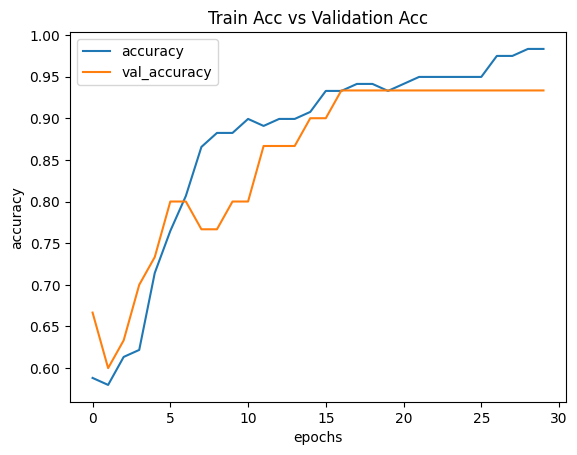

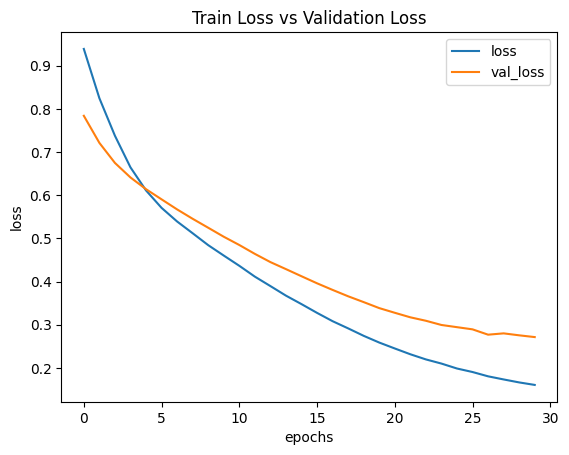

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

RandomSearch

In [ ]:
study = optuna.create_study(direction='minimize', sampler= optuna.samplers.RandomSampler())

[I 2025-05-18 16:01:17,052] A new study created in memory with name: no-name-06d337d1-4c5a-4e87-b398-93d190b06d7c


In [ ]:
study.optimize(objective,n_trials=10)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6118 - loss: 0.6867 - precision_48: 0.3500 - recall_48: 0.0852 - val_accuracy: 0.6667 - val_loss: 0.6742 - val_precision_48: 0.0000e+00 - val_recall_48: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6202 - loss: 0.6639 - precision_48: 0.0000e+00 - recall_48: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6538 - val_precision_48: 0.0000e+00 - val_recall_48: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6489 - loss: 0.6317 - precision_48: 0.0000e+00 - recall_48: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6376 - val_precision_48: 0.0000e+00 - val_recall_48: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5594 - loss: 0.6303 - precision_48: 0.0000e+00 - recall_48: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6230 - val_precision_48: 0.0000e+00 - val_recall_48: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 

[I 2025-05-18 16:02:05,070] Trial 0 finished with value: 0.31884482502937317 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'relu', 'units_2': 4, 'activation_2': 'relu', 'units_3': 12, 'activation_3': 'tanh', 'optimizer': 'adam'}. Best is trial 0 with value: 0.31884482502937317.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6192 - loss: 1.0771 - precision_49: 0.2500 - recall_49: 0.0055 - val_accuracy: 0.6667 - val_loss: 0.9680 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5397 - loss: 1.0974 - precision_49: 0.4542 - recall_49: 0.0503 - val_accuracy: 0.6667 - val_loss: 0.7752 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5773 - loss: 0.8429 - precision_49: 0.6821 - recall_49: 0.1005 - val_accuracy: 0.7000 - val_loss: 0.6467 - val_precision_49: 1.0000 - val_recall_49: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6504 - loss: 0.6547 - precision_49: 0.7582 - recall_49: 0.2682 - val_accuracy: 0.7667 - val_loss: 0.5750 - val_precision_49: 1.0000 - val_recall_49: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7332 - loss: 0.5254 - precision_49: 0.8

[I 2025-05-18 16:02:14,378] Trial 1 finished with value: 0.2536502778530121 and parameters: {'num_layers': 1, 'units_1': 11, 'activation_1': 'PReLU', 'optimizer': 'adam'}. Best is trial 1 with value: 0.2536502778530121.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.6839 - loss: 0.6152 - precision_50: 0.0000e+00 - recall_50: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6124 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5530 - loss: 0.6693 - precision_50: 0.0000e+00 - recall_50: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6066 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6185 - loss: 0.6239 - precision_50: 0.0000e+00 - recall_50: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5985 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5745 - loss: 0.6279 - precision_50: 0.0000e+00 - recall_50: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5902 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - a

[I 2025-05-18 16:02:27,655] Trial 2 finished with value: 0.23311977088451385 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'tanh', 'units_2': 10, 'activation_2': 'sigmoid', 'units_3': 9, 'activation_3': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.23311977088451385.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4041 - loss: 0.8161 - precision_51: 0.4041 - recall_51: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7921 - val_precision_51: 0.3333 - val_recall_51: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4176 - loss: 0.7521 - precision_51: 0.4023 - recall_51: 0.9974 - val_accuracy: 0.3333 - val_loss: 0.7385 - val_precision_51: 0.3214 - val_recall_51: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5138 - loss: 0.6979 - precision_51: 0.4666 - recall_51: 0.9579 - val_accuracy: 0.4333 - val_loss: 0.7016 - val_precision_51: 0.3333 - val_recall_51: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5965 - loss: 0.6879 - precision_51: 0.4995 - recall_51: 0.8590 - val_accuracy: 0.7000 - val_loss: 0.6760 - val_precision_51: 0.5385 - val_recall_51: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5895 - loss: 0.6750 - precision_51: 0.5531 - recall_51:

[I 2025-05-18 16:02:36,294] Trial 3 finished with value: 0.4940338134765625 and parameters: {'num_layers': 1, 'units_1': 14, 'activation_1': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.23311977088451385.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6000 - loss: 0.6732 - precision_52: 0.5529 - recall_52: 0.5869 - val_accuracy: 0.6000 - val_loss: 0.6117 - val_precision_52: 0.4167 - val_recall_52: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6598 - loss: 0.6454 - precision_52: 0.6145 - recall_52: 0.5148 - val_accuracy: 0.7000 - val_loss: 0.6044 - val_precision_52: 0.5556 - val_recall_52: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6525 - loss: 0.6394 - precision_52: 0.6268 - recall_52: 0.5162 - val_accuracy: 0.7000 - val_loss: 0.5997 - val_precision_52: 0.5556 - val_recall_52: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6758 - loss: 0.6312 - precision_52: 0.6218 - recall_52: 0.4740 - val_accuracy: 0.7000 - val_loss: 0.5965 - val_precision_52: 0.5556 - val_recall_52: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6767 - loss: 0.6240 - precision_52: 0.6868 - recall_52:

[I 2025-05-18 16:02:44,563] Trial 4 finished with value: 0.3704143762588501 and parameters: {'num_layers': 3, 'units_1': 5, 'activation_1': 'relu', 'units_2': 5, 'activation_2': 'tanh', 'units_3': 13, 'activation_3': 'tanh', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.23311977088451385.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6026 - loss: 0.6833 - precision_53: 0.2656 - recall_53: 0.0244 - val_accuracy: 0.6333 - val_loss: 0.6636 - val_precision_53: 0.0000e+00 - val_recall_53: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.6656 - precision_53: 0.2500 - recall_53: 0.0221 - val_accuracy: 0.6333 - val_loss: 0.6457 - val_precision_53: 0.0000e+00 - val_recall_53: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6018 - loss: 0.6626 - precision_53: 0.4320 - recall_53: 0.1061 - val_accuracy: 0.7667 - val_loss: 0.6309 - val_precision_53: 0.8000 - val_recall_53: 0.4000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7828 - loss: 0.6140 - precision_53: 0.9206 - recall_53: 0.4131 - val_accuracy: 0.9000 - val_loss: 0.6168 - val_precision_53: 0.8889 - val_recall_53: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8113 - loss: 0.6274 - precision_53: 0.8

[I 2025-05-18 16:02:52,043] Trial 5 finished with value: 0.20310963690280914 and parameters: {'num_layers': 4, 'units_1': 12, 'activation_1': 'relu', 'units_2': 5, 'activation_2': 'relu', 'units_3': 14, 'activation_3': 'relu', 'units_4': 10, 'activation_4': 'tanh', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.20310963690280914.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4324 - loss: 0.8060 - precision_54: 0.4324 - recall_54: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.8276 - val_precision_54: 0.3333 - val_recall_54: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4662 - loss: 0.7302 - precision_54: 0.4662 - recall_54: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7869 - val_precision_54: 0.3333 - val_recall_54: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4304 - loss: 0.7253 - precision_54: 0.4304 - recall_54: 1.0000 - val_accuracy: 0.3000 - val_loss: 0.7539 - val_precision_54: 0.3103 - val_recall_54: 0.9000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3979 - loss: 0.7167 - precision_54: 0.3914 - recall_54: 0.9893 - val_accuracy: 0.3333 - val_loss: 0.7276 - val_precision_54: 0.3214 - val_recall_54: 0.9000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4741 - loss: 0.6802 - precision_54: 0.4608 - recall_54

[I 2025-05-18 16:03:00,468] Trial 6 finished with value: 0.4251052141189575 and parameters: {'num_layers': 1, 'units_1': 12, 'activation_1': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.20310963690280914.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5930 - loss: 0.6547 - precision_55: 0.5519 - recall_55: 0.2489 - val_accuracy: 0.7000 - val_loss: 0.6110 - val_precision_55: 0.6667 - val_recall_55: 0.2000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7020 - loss: 0.5966 - precision_55: 0.7698 - recall_55: 0.4511 - val_accuracy: 0.7000 - val_loss: 0.5910 - val_precision_55: 0.6667 - val_recall_55: 0.2000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7141 - loss: 0.5494 - precision_55: 0.6955 - recall_55: 0.5892 - val_accuracy: 0.7000 - val_loss: 0.5739 - val_precision_55: 0.6667 - val_recall_55: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7878 - loss: 0.5000 - precision_55: 0.7318 - recall_55: 0.5906 - val_accuracy: 0.7000 - val_loss: 0.5606 - val_precision_55: 0.6667 - val_recall_55: 0.2000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7796 - loss: 0.4659 - precision_55: 0.7698 - recall_55:

[I 2025-05-18 16:03:09,119] Trial 7 finished with value: 0.6264486908912659 and parameters: {'num_layers': 4, 'units_1': 7, 'activation_1': 'tanh', 'units_2': 15, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'PReLU', 'units_4': 12, 'activation_4': 'relu', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.20310963690280914.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4333 - loss: 0.7363 - precision_56: 0.3427 - recall_56: 0.4283 - val_accuracy: 0.5333 - val_loss: 0.7219 - val_precision_56: 0.2500 - val_recall_56: 0.2000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5452 - loss: 0.6984 - precision_56: 0.3999 - recall_56: 0.5127 - val_accuracy: 0.5333 - val_loss: 0.6969 - val_precision_56: 0.2500 - val_recall_56: 0.2000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7002 - loss: 0.6544 - precision_56: 0.5803 - recall_56: 0.6494 - val_accuracy: 0.6000 - val_loss: 0.6789 - val_precision_56: 0.3750 - val_recall_56: 0.3000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7148 - loss: 0.6448 - precision_56: 0.6579 - recall_56: 0.5928 - val_accuracy: 0.6667 - val_loss: 0.6601 - val_precision_56: 0.5000 - val_recall_56: 0.4000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7052 - loss: 0.6140 - precision_56: 0.5945 - recall_56:

[I 2025-05-18 16:03:17,373] Trial 8 finished with value: 0.27326732873916626 and parameters: {'num_layers': 2, 'units_1': 10, 'activation_1': 'tanh', 'units_2': 4, 'activation_2': 'relu', 'optimizer': 'adam'}. Best is trial 5 with value: 0.20310963690280914.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5029 - loss: 0.6910 - precision_57: 0.3826 - recall_57: 0.2904 - val_accuracy: 0.4667 - val_loss: 0.7022 - val_precision_57: 0.1250 - val_recall_57: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6031 - loss: 0.6814 - precision_57: 0.5077 - recall_57: 0.3327 - val_accuracy: 0.5000 - val_loss: 0.6949 - val_precision_57: 0.2222 - val_recall_57: 0.2000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5811 - loss: 0.6840 - precision_57: 0.4372 - recall_57: 0.2628 - val_accuracy: 0.5333 - val_loss: 0.6881 - val_precision_57: 0.2500 - val_recall_57: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5971 - loss: 0.6710 - precision_57: 0.4700 - recall_57: 0.2877 - val_accuracy: 0.6000 - val_loss: 0.6795 - val_precision_57: 0.3750 - val_recall_57: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5671 - loss: 0.6683 - precision_57: 0.4259 - recall_5

[I 2025-05-18 16:03:25,953] Trial 9 finished with value: 0.23383058607578278 and parameters: {'num_layers': 2, 'units_1': 15, 'activation_1': 'relu', 'units_2': 5, 'activation_2': 'relu', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.20310963690280914.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_activation_4,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,params_units_4,state
0,0,0.318845,2025-05-18 16:01:55.232409,2025-05-18 16:02:05.068599,0 days 00:00:09.836190,relu,relu,tanh,NaN,3,adam,8,4.0,12.0,NaN,COMPLETE
1,1,0.253650,2025-05-18 16:02:05.071872,2025-05-18 16:02:14.378113,0 days 00:00:09.306241,PReLU,NaN,NaN,NaN,1,adam,11,NaN,NaN,NaN,COMPLETE
2,2,0.233120,2025-05-18 16:02:14.380511,2025-05-18 16:02:27.653687,0 days 00:00:13.273176,tanh,sigmoid,relu,NaN,3,adam,4,10.0,9.0,NaN,COMPLETE
3,3,0.494034,2025-05-18 16:02:27.656704,2025-05-18 16:02:36.292884,0 days 00:00:08.636180,sigmoid,NaN,NaN,NaN,1,sgd,14,NaN,NaN,NaN,COMPLETE
4,4,0.370414,2025-05-18 16:02:36.296000,2025-05-18 16:02:44.561826,0 days 00:00:08.265826,relu,tanh,tanh,NaN,3,sgd,5,5.0,13.0,NaN,COMPLETE
5,5,0.203110,2025-05-18 16:02:44.565599,2025-05-18 16:02:52.041706,0 days 00:00:07.476107,relu,relu,relu,tanh,4,sgd,12,5.0,14.0,10.0,COMPLETE
6,6,0.425105,2025-05-18 16:02:52.044563,2025-05-18 16:03:00.466836,0 days 00:00:08.422273,sigmoid,NaN,NaN,NaN,1,rmsprop,12,NaN,NaN,NaN,COMPLETE
7,7,0.626449,2025-05-18 16:03:00.469398,2025-05-18 16:03:09.118134,0 days 00:00:08.648736,tanh,relu,PReLU,relu,4,rmsprop,7,15.0,16.0,12.0,COMPLETE
8,8,0.273267,2025-05-18 16:03:09.121092,2025-05-18 16:03:17.372042,0 days 00:00:08.250950,tanh,relu,NaN,NaN,2,adam,10,4.0,NaN,NaN,COMPLETE
9,9,0.233831,2025-05-18 16:03:17.374563,2025-05-18 16:03:25.951761,0 days 00:00:08.577198,relu,relu,NaN,NaN,2,sgd,15,5.0,NaN,NaN,COMPLETE


In [ ]:
study.best_params

{'num_layers': 4,
 'units_1': 12,
 'activation_1': 'relu',
 'units_2': 5,
 'activation_2': 'relu',
 'units_3': 14,
 'activation_3': 'relu',
 'units_4': 10,
 'activation_4': 'tanh',
 'optimizer': 'sgd'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=15, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4977 - loss: 0.7271 - precision_58: 0.4450 - recall_58: 0.9663 - val_accuracy: 0.4667 - val_loss: 0.7719 - val_precision_58: 0.3846 - val_recall_58: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5692 - loss: 0.6699 - precision_58: 0.4977 - recall_58: 0.8976 - val_accuracy: 0.5667 - val_loss: 0.6773 - val_precision_58: 0.4348 - val_recall_58: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6488 - loss: 0.6122 - precision_58: 0.5278 - recall_58: 0.8833 - val_accuracy: 0.6333 - val_loss: 0.6034 - val_precision_58: 0.4706 - val_recall_58: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7288 - loss: 0.5339 - precision_58: 0.6538 - recall_58: 0.7982 - val_accuracy: 0.7000 - val_loss: 0.5488 - val_precision_58: 0.5333 - val_recall_58: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8009 - loss: 0.5089 - precision_58: 0.7947 - recall_58:

In [ ]:
model.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_193 (Dense)               │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

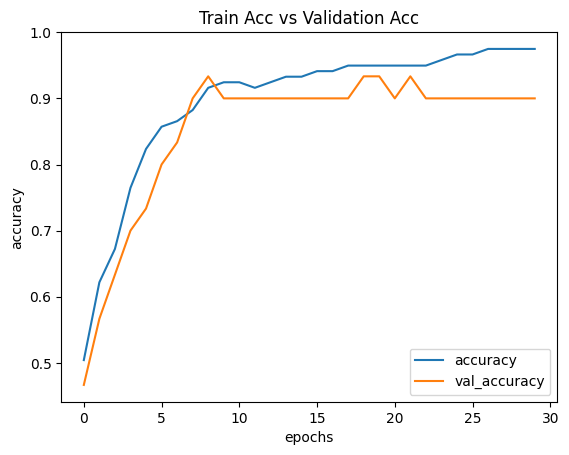

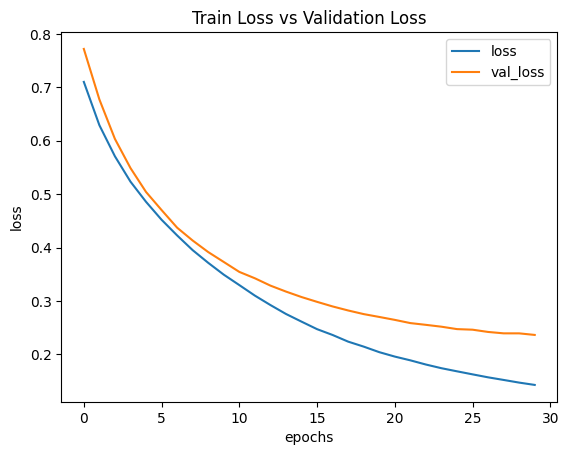

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

Bayesian Search

In [ ]:
study = optuna.create_study(direction='minimize', sampler = optuna.samplers.TPESampler())

[I 2025-05-18 16:10:59,064] A new study created in memory with name: no-name-d4d9be94-5f55-49e2-b22a-8011edc44d93


In [ ]:
study.optimize(objective, n_trials=10)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7542 - loss: 0.5704 - precision_59: 0.6997 - recall_59: 0.7080 - val_accuracy: 0.7333 - val_loss: 0.6190 - val_precision_59: 0.6000 - val_recall_59: 0.6000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7404 - loss: 0.5400 - precision_59: 0.7014 - recall_59: 0.6389 - val_accuracy: 0.7667 - val_loss: 0.5609 - val_precision_59: 0.6364 - val_recall_59: 0.7000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8706 - loss: 0.4362 - precision_59: 0.8270 - recall_59: 0.8198 - val_accuracy: 0.8000 - val_loss: 0.5133 - val_precision_59: 0.7000 - val_recall_59: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8901 - loss: 0.4055 - precision_59: 0.8338 - recall_59: 0.8735 - val_accuracy: 0.8333 - val_loss: 0.4814 - val_precision_59: 0.6923 - val_recall_59: 0.9000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9320 - loss: 0.3635 - precision_59: 0.9338 - recall_59

[I 2025-05-18 16:13:37,365] Trial 0 finished with value: 0.2703697979450226 and parameters: {'num_layers': 2, 'units_1': 16, 'activation_1': 'tanh', 'units_2': 13, 'activation_2': 'tanh', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2703697979450226.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5651 - loss: 0.6853 - precision_60: 0.0000e+00 - recall_60: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6341 - val_precision_60: 0.0000e+00 - val_recall_60: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6132 - loss: 0.6598 - precision_60: 0.0000e+00 - recall_60: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6340 - val_precision_60: 0.0000e+00 - val_recall_60: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5708 - loss: 0.6765 - precision_60: 0.0000e+00 - recall_60: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6340 - val_precision_60: 0.0000e+00 - val_recall_60: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5886 - loss: 0.6735 - precision_60: 0.0000e+00 - recall_60: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6339 - val_precision_60: 0.0000e+00 - val_recall_60: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - ac

[I 2025-05-18 16:13:46,226] Trial 1 finished with value: 0.6303573846817017 and parameters: {'num_layers': 4, 'units_1': 11, 'activation_1': 'sigmoid', 'units_2': 7, 'activation_2': 'PReLU', 'units_3': 13, 'activation_3': 'relu', 'units_4': 16, 'activation_4': 'tanh', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.2703697979450226.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3439 - loss: 0.7177 - precision_61: 0.3697 - recall_61: 0.4768 - val_accuracy: 0.4000 - val_loss: 0.7065 - val_precision_61: 0.3182 - val_recall_61: 0.7000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3681 - loss: 0.7133 - precision_61: 0.3085 - recall_61: 0.4614 - val_accuracy: 0.4667 - val_loss: 0.6940 - val_precision_61: 0.3333 - val_recall_61: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4619 - loss: 0.7022 - precision_61: 0.3919 - recall_61: 0.3663 - val_accuracy: 0.5667 - val_loss: 0.6841 - val_precision_61: 0.3636 - val_recall_61: 0.4000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4445 - loss: 0.6982 - precision_61: 0.2986 - recall_61: 0.2475 - val_accuracy: 0.6000 - val_loss: 0.6738 - val_precision_61: 0.3750 - val_recall_61: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6136 - loss: 0.6835 - precision_61: 0.5529 - recall_61:

[I 2025-05-18 16:13:54,602] Trial 2 finished with value: 0.5087326169013977 and parameters: {'num_layers': 1, 'units_1': 9, 'activation_1': 'sigmoid', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2703697979450226.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5873 - loss: 0.6896 - precision_62: 0.4576 - recall_62: 0.3287 - val_accuracy: 0.6667 - val_loss: 0.6848 - val_precision_62: 0.5000 - val_recall_62: 0.2000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6142 - loss: 0.6882 - precision_62: 0.8030 - recall_62: 0.2840 - val_accuracy: 0.6667 - val_loss: 0.6812 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5628 - loss: 0.6853 - precision_62: 0.0000e+00 - recall_62: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6781 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5591 - loss: 0.6858 - precision_62: 0.0000e+00 - recall_62: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6755 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5181 - loss: 0.

[I 2025-05-18 16:14:03,210] Trial 3 finished with value: 0.6519566774368286 and parameters: {'num_layers': 4, 'units_1': 10, 'activation_1': 'PReLU', 'units_2': 10, 'activation_2': 'sigmoid', 'units_3': 12, 'activation_3': 'sigmoid', 'units_4': 13, 'activation_4': 'tanh', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.2703697979450226.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6834 - loss: 0.5879 - precision_63: 0.6821 - recall_63: 0.2488 - val_accuracy: 0.7000 - val_loss: 0.5337 - val_precision_63: 1.0000 - val_recall_63: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8375 - loss: 0.4610 - precision_63: 0.9020 - recall_63: 0.7042 - val_accuracy: 0.8333 - val_loss: 0.4710 - val_precision_63: 1.0000 - val_recall_63: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9247 - loss: 0.4313 - precision_63: 0.9355 - recall_63: 0.8590 - val_accuracy: 0.8667 - val_loss: 0.4236 - val_precision_63: 1.0000 - val_recall_63: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9709 - loss: 0.3500 - precision_63: 0.9607 - recall_63: 0.9715 - val_accuracy: 0.8667 - val_loss: 0.3844 - val_precision_63: 1.0000 - val_recall_63: 0.6000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9762 - loss: 0.3020 - precision_63: 0.9450 - recall_

[I 2025-05-18 16:14:10,944] Trial 4 finished with value: 0.2602834105491638 and parameters: {'num_layers': 2, 'units_1': 14, 'activation_1': 'relu', 'units_2': 15, 'activation_2': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.2602834105491638.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3954 - loss: 0.9565 - precision_64: 0.3540 - recall_64: 0.4913 - val_accuracy: 0.4667 - val_loss: 0.8604 - val_precision_64: 0.2500 - val_recall_64: 0.3000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3813 - loss: 0.8501 - precision_64: 0.1624 - recall_64: 0.1745 - val_accuracy: 0.5333 - val_loss: 0.8179 - val_precision_64: 0.3000 - val_recall_64: 0.3000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3739 - loss: 0.8300 - precision_64: 0.2333 - recall_64: 0.2391 - val_accuracy: 0.6000 - val_loss: 0.7857 - val_precision_64: 0.3750 - val_recall_64: 0.3000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5671 - loss: 0.7630 - precision_64: 0.3354 - recall_64: 0.3237 - val_accuracy: 0.6000 - val_loss: 0.7583 - val_precision_64: 0.3750 - val_recall_64: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5150 - loss: 0.8399 - precision_64: 0.4418 - recall_64:

[I 2025-05-18 16:14:17,903] Trial 5 finished with value: 0.36908799409866333 and parameters: {'num_layers': 1, 'units_1': 5, 'activation_1': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.2602834105491638.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5857 - loss: 0.8880 - precision_65: 0.5385 - recall_65: 0.8743 - val_accuracy: 0.5333 - val_loss: 0.8839 - val_precision_65: 0.4091 - val_recall_65: 0.9000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5917 - loss: 0.8269 - precision_65: 0.5627 - recall_65: 0.7372 - val_accuracy: 0.5667 - val_loss: 0.8292 - val_precision_65: 0.4286 - val_recall_65: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5626 - loss: 0.7564 - precision_65: 0.5080 - recall_65: 0.6019 - val_accuracy: 0.6333 - val_loss: 0.7936 - val_precision_65: 0.4737 - val_recall_65: 0.9000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4947 - loss: 0.7922 - precision_65: 0.3118 - recall_65: 0.3599 - val_accuracy: 0.6333 - val_loss: 0.7660 - val_precision_65: 0.4737 - val_recall_65: 0.9000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5808 - loss: 0.7799 - precision_65: 0.4365 - recall_6

[I 2025-05-18 16:14:26,142] Trial 6 finished with value: 0.40905094146728516 and parameters: {'num_layers': 2, 'units_1': 7, 'activation_1': 'PReLU', 'units_2': 4, 'activation_2': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.2602834105491638.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5776 - loss: 0.6859 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6620 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5990 - loss: 0.6810 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6608 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6025 - loss: 0.6775 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6599 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5794 - loss: 0.6830 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6591 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - a

[I 2025-05-18 16:14:35,778] Trial 7 finished with value: 0.6459321975708008 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'relu', 'units_2': 15, 'activation_2': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 4 with value: 0.2602834105491638.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4683 - loss: 0.7127 - precision_67: 0.4405 - recall_67: 1.0000 - val_accuracy: 0.4667 - val_loss: 0.7035 - val_precision_67: 0.3846 - val_recall_67: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5430 - loss: 0.6835 - precision_67: 0.4328 - recall_67: 0.8920 - val_accuracy: 0.7000 - val_loss: 0.6468 - val_precision_67: 0.5455 - val_recall_67: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7699 - loss: 0.6392 - precision_67: 0.7182 - recall_67: 0.5666 - val_accuracy: 0.7000 - val_loss: 0.6142 - val_precision_67: 1.0000 - val_recall_67: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6470 - loss: 0.6281 - precision_67: 0.9375 - recall_67: 0.1757 - val_accuracy: 0.6667 - val_loss: 0.5876 - val_precision_67: 0.0000e+00 - val_recall_67: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6518 - loss: 0.5853 - precision_67: 1.0000 - re

[I 2025-05-18 16:14:46,326] Trial 8 finished with value: 0.24504095315933228 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 8, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'tanh', 'optimizer': 'adam'}. Best is trial 8 with value: 0.24504095315933228.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7445 - loss: 0.6574 - precision_68: 0.6607 - recall_68: 0.7360 - val_accuracy: 0.7667 - val_loss: 0.6433 - val_precision_68: 0.8000 - val_recall_68: 0.4000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7548 - loss: 0.6393 - precision_68: 0.7946 - recall_68: 0.5625 - val_accuracy: 0.7667 - val_loss: 0.6148 - val_precision_68: 0.8000 - val_recall_68: 0.4000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 0.6183 - precision_68: 0.9089 - recall_68: 0.5197 - val_accuracy: 0.7667 - val_loss: 0.5937 - val_precision_68: 0.8000 - val_recall_68: 0.4000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8389 - loss: 0.5867 - precision_68: 0.8826 - recall_68: 0.7062 - val_accuracy: 0.8000 - val_loss: 0.5749 - val_precision_68: 0.8333 - val_recall_68: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8463 - loss: 0.5790 - precision_68: 0.9392 - recall_68

[I 2025-05-18 16:14:54,133] Trial 9 finished with value: 0.2530145049095154 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'tanh', 'units_2': 12, 'activation_2': 'sigmoid', 'units_3': 16, 'activation_3': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 8 with value: 0.24504095315933228.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_activation_4,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,params_units_4,state
0,0,0.270370,2025-05-18 16:13:27.482548,2025-05-18 16:13:37.364687,0 days 00:00:09.882139,tanh,tanh,NaN,NaN,2,adam,16,13.0,NaN,NaN,COMPLETE
1,1,0.630357,2025-05-18 16:13:37.366930,2025-05-18 16:13:46.224908,0 days 00:00:08.857978,sigmoid,PReLU,relu,tanh,4,adagrad,11,7.0,13.0,16.0,COMPLETE
2,2,0.508733,2025-05-18 16:13:46.227544,2025-05-18 16:13:54.597690,0 days 00:00:08.370146,sigmoid,NaN,NaN,NaN,1,adam,9,NaN,NaN,NaN,COMPLETE
3,3,0.651957,2025-05-18 16:13:54.603879,2025-05-18 16:14:03.209252,0 days 00:00:08.605373,PReLU,sigmoid,sigmoid,tanh,4,adagrad,10,10.0,12.0,13.0,COMPLETE
4,4,0.260283,2025-05-18 16:14:03.211785,2025-05-18 16:14:10.943198,0 days 00:00:07.731413,relu,tanh,NaN,NaN,2,rmsprop,14,15.0,NaN,NaN,COMPLETE
5,5,0.369088,2025-05-18 16:14:10.945316,2025-05-18 16:14:17.901492,0 days 00:00:06.956176,PReLU,NaN,NaN,NaN,1,rmsprop,5,NaN,NaN,NaN,COMPLETE
6,6,0.409051,2025-05-18 16:14:17.904483,2025-05-18 16:14:26.141666,0 days 00:00:08.237183,PReLU,PReLU,NaN,NaN,2,rmsprop,7,4.0,NaN,NaN,COMPLETE
7,7,0.645932,2025-05-18 16:14:26.143555,2025-05-18 16:14:35.775976,0 days 00:00:09.632421,relu,sigmoid,NaN,NaN,2,adagrad,8,15.0,NaN,NaN,COMPLETE
8,8,0.245041,2025-05-18 16:14:35.779592,2025-05-18 16:14:46.324875,0 days 00:00:10.545283,sigmoid,relu,tanh,NaN,3,adam,4,8.0,16.0,NaN,COMPLETE
9,9,0.253015,2025-05-18 16:14:46.327670,2025-05-18 16:14:54.130900,0 days 00:00:07.803230,tanh,sigmoid,PReLU,NaN,3,rmsprop,8,12.0,16.0,NaN,COMPLETE


In [ ]:
study.best_params

{'num_layers': 3,
 'units_1': 4,
 'activation_1': 'sigmoid',
 'units_2': 8,
 'activation_2': 'relu',
 'units_3': 16,
 'activation_3': 'tanh',
 'optimizer': 'adam'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=8))
model.add(PReLU())
model.add(keras.layers.Dense(units=8, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3956 - loss: 0.7927 - precision_69: 0.4148 - recall_69: 0.7872 - val_accuracy: 0.3000 - val_loss: 0.8676 - val_precision_69: 0.2800 - val_recall_69: 0.7000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3600 - loss: 0.8182 - precision_69: 0.3061 - recall_69: 0.6691 - val_accuracy: 0.3667 - val_loss: 0.8059 - val_precision_69: 0.2857 - val_recall_69: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4915 - loss: 0.7193 - precision_69: 0.4415 - recall_69: 0.7552 - val_accuracy: 0.4667 - val_loss: 0.7652 - val_precision_69: 0.3333 - val_recall_69: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4788 - loss: 0.7080 - precision_69: 0.3717 - recall_69: 0.5759 - val_accuracy: 0.5333 - val_loss: 0.7336 - val_precision_69: 0.3750 - val_recall_69: 0.6000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6152 - loss: 0.6771 - precision_69: 0.5249 - recall_

In [ ]:
model.summary()

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_229 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_34 (PReLU)              │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

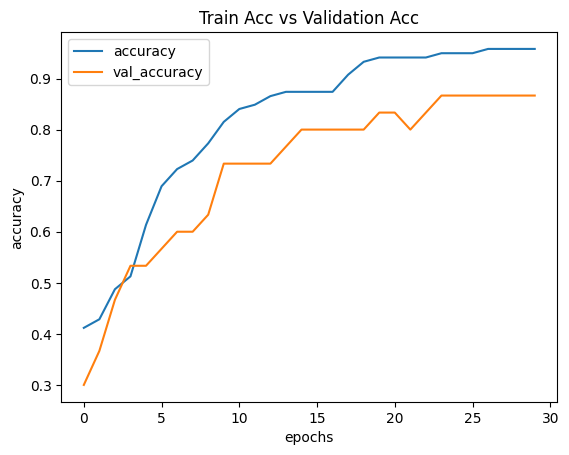

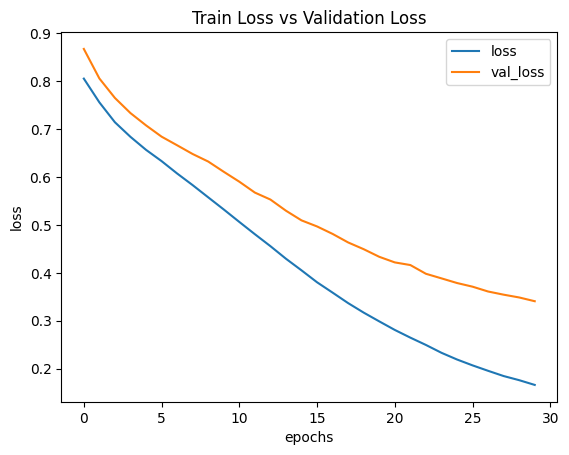

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

In [ ]:
grid_search = {
    'num_layers': 2,
    'units_1': 16, 'use_prelu_1': False, 'activation_1': 'tanh',
    'units_2': 8,  'use_prelu_2': True,
    'optimizer': 'adam'
}

random_search = {
    'num_layers': 3,
    'units_1': 15, 'use_prelu_1': False, 'activation_1': 'tanh',
    'units_2': 10, 'use_prelu_2': False, 'activation_2': 'relu',
    'units_3': 15, 'use_prelu_3': False, 'activation_3': 'tanh',
    'optimizer': 'adam'
}

bayesian_search = {
    'num_layers': 4,
    'units_1': 7,  'use_prelu_1': False, 'activation_1': 'sigmoid',
    'units_2': 15, 'use_prelu_2': True,
    'units_3': 5,  'use_prelu_3': False, 'activation_3': 'relu',
    'units_4': 7,  'use_prelu_4': True,
    'optimizer': 'adam'
}




In [ ]:
results = [grid_search, random_search, bayesian_search]
results_df = pd.DataFrame(results, index=['Grid Search', 'Random Search', 'Bayesian Search'])

results_df

,num_layers,units_1,use_prelu_1,activation_1,units_2,use_prelu_2,optimizer,activation_2,units_3,use_prelu_3,activation_3,units_4,use_prelu_4
Grid Search,2,16,False,tanh,8,True,adam,NaN,NaN,NaN,NaN,NaN,NaN
Random Search,3,15,False,tanh,10,False,adam,relu,15.0,False,tanh,NaN,NaN
Bayesian Search,4,7,False,sigmoid,15,True,adam,NaN,5.0,False,relu,7.0,True
